
# Ejercicio 4: Detección de anomalías en series temporales usando LLMs

---

## 🎯 Objetivo

Utilizar un modelo de lenguaje (ChatGPT, Gemini) para detectar **anomalías** en una serie temporal de consumo energético, identificando días con valores inusuales mediante instrucciones en lenguaje natural.  
El alumnado aprenderá a interpretar gráficas generadas, formular hipótesis y validar resultados usando código generado por el modelo.

---

## 📁 Dataset utilizado

Ejemplo de contenido:

```
fecha,consumo_kWh
2023-01-01,34.5
2023-01-02,30.2
2023-01-03,33.8
2023-01-04,120.0   Anomalía
2023-01-05,29.9
2023-01-06,NaN
2023-01-07,32.1
2023-01-08,28.3
2023-01-09,90.0    Anomalía
2023-01-10,30.0
```
---

## ¿Qué es una anomalía?

Una **anomalía** es un valor que **se desvía mucho del comportamiento normal esperado**. En este contexto, puede indicar:
- Lecturas erróneas del medidor.
- Consumos inesperados por averías o eventos especiales.
- Problemas de captura o ingreso de datos.

---

## Descripción del ejercicio

---

### Paso 1: Subir el archivo al LLM

Abre [ChatGPT con Code Interpreter](https://chat.openai.com/) o [Gemini](https://gemini.google.com/), y copia y pega el contenido

---

### 🔹 Paso 2: Prompt inicial para detectar anomalías

```plaintext
Este archivo contiene el consumo energético diario de un centro educativo.

1. ¿Puedes detectar si hay valores inusuales o posibles errores?
2. ¿Qué días se desvían significativamente del consumo medio?
3. ¿Puedes generar un gráfico con los puntos anómalos destacados en rojo?

Si necesitas asumir algo, indícalo.
```

---

### 🔍 Paso 3: Interpretar la respuesta del modelo

> Listo, ya cargamos y ordenamos los datos. A simple vista, se pueden notar un par de valores que podrían ser anómalos:
> - 120.0 kWh el 4 de enero.
> - 90.0 kWh el 9 de enero.
> - Además, hay un valor faltante (NaN) el 6 de enero.
> El gráfico muestra el consumo diario de energía, y los puntos en rojo indican las anomalías detectadas usando el método del rango intercuartílico (IQR). Como esperábamos, los días 4 y 9 de enero aparecen como fuera de lo común.

![](img/m6_e4_anomalia.png)
---

### 📉 Paso 4: Validar con código generado

El alumnado puede pedir:

```plaintext
Muéstrame el código en Python que has utilizado para detectar esas anomalías y generar el gráfico.
```

> Claro! Aquí te dejo el código completo en Python que utilicé para detectar las anomalías usando el método del rango intercuartílico (IQR) y generar el gráfico:

/var/folders/kh/vywr4v293s1fmshzbj358gw40000gn/T/ipykernel_4285/1149758724.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp["consumo_kWh"].fillna(method="ffill", inplace=True)
/var/folders/kh/vywr4v293s1fmshzbj358gw40000gn/T/ipykernel_4285/1149758724.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temp["consumo_kWh"].fillna(method="ffill", inplace=True)


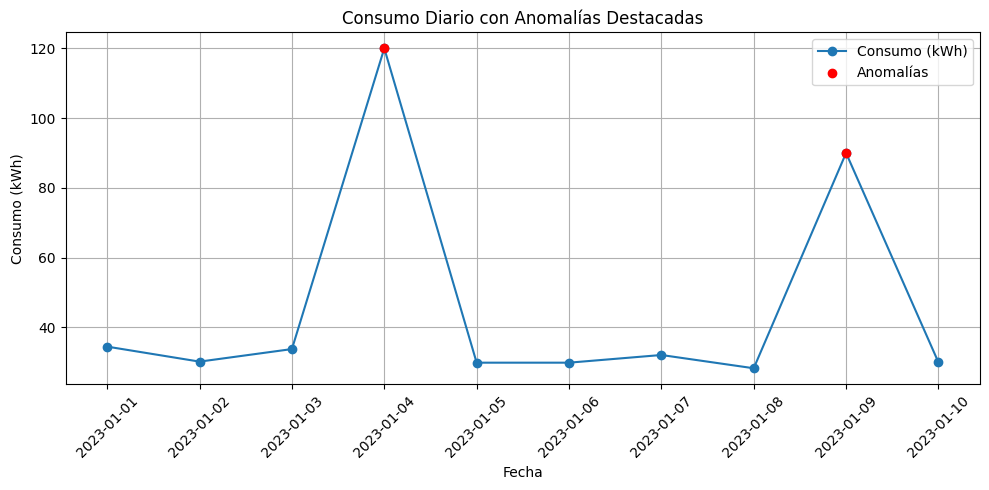

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame desde los datos CSV
data = {
    "fecha": [
        "2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05",
        "2023-01-06", "2023-01-07", "2023-01-08", "2023-01-09", "2023-01-10"
    ],
    "consumo_kWh": [34.5, 30.2, 33.8, 120.0, 29.9, None, 32.1, 28.3, 90.0, 30.0]
}

df = pd.DataFrame(data)
df["fecha"] = pd.to_datetime(df["fecha"])

# Rellenar valores faltantes (NaN) para el análisis (no imputación definitiva)
df_temp = df.copy()
df_temp["consumo_kWh"].fillna(method="ffill", inplace=True)

# Detección de anomalías usando el método IQR
Q1 = df_temp["consumo_kWh"].quantile(0.25)
Q3 = df_temp["consumo_kWh"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_temp["anomaly"] = (df_temp["consumo_kWh"] < lower_bound) | (df_temp["consumo_kWh"] > upper_bound)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(df_temp["fecha"], df_temp["consumo_kWh"], label="Consumo (kWh)", marker="o")
plt.scatter(df_temp[df_temp["anomaly"]]["fecha"],
            df_temp[df_temp["anomaly"]]["consumo_kWh"],
            color="red", label="Anomalías", zorder=5)
plt.title("Consumo Diario con Anomalías Destacadas")
plt.xlabel("Fecha")
plt.ylabel("Consumo (kWh)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🧠 Discusión posterior

**Preguntas para reflexionar:**
- ¿Qué criterio ha usado el modelo para definir una anomalía?
- ¿Se podría usar otro enfoque (por ejemplo, desviación intercuartílica, media móvil...)?
- ¿Qué impacto tendría no detectar esas anomalías?
- ¿Podría una anomalía ser un evento real y no un error?

---

## Variante del ejercicio

### Carga del sataset
Usar el conjunto de datos disponible en:

```
data/m6_consumo_energia.csv
```
 Ejecución de prompt
Y enviamos el mismo prompt
```plaintext
Este archivo contiene el consumo energético diario de un centro educativo.

1. ¿Puedes detectar si hay valores inusuales o posibles errores?
2. ¿Qué días se desvían significativamente del consumo medio?
3. ¿Puedes generar un gráfico con los puntos anómalos destacados en rojo?

Si necesitas asumir algo, indícalo.
```

> Ya cargué el dataset. Tiene 184 registros con las siguientes columnas:
> - Fecha
> - Energia Consumida (hay 4 valores faltantes)
> - Temperatura (también 4 valores faltantes)
> - Humedad (4 valores faltantes)
> 
> Vamos a enfocarnos ahora en:
> - Detectar valores inusuales o posibles errores en el consumo.
> - Identificar los días con desviaciones significativas del promedio.
> - Graficar los valores anómalos en rojo.
> Voy a comenzar limpiando los datos y aplicando un análisis de anomalías similar al que hicimos antes

![](img/m6_e4_anomalia_zscore.png)

### Genración de código

```
Dame el código en python para detectar anomalías con z-score y generar el gráfico anterior
```

> ¡Claro! Aquí tenés el código completo en Python para **detectar anomalías usando z-score con umbral ±2** y **generar el gráfico** donde se destacan en rojo los valores anómalos:

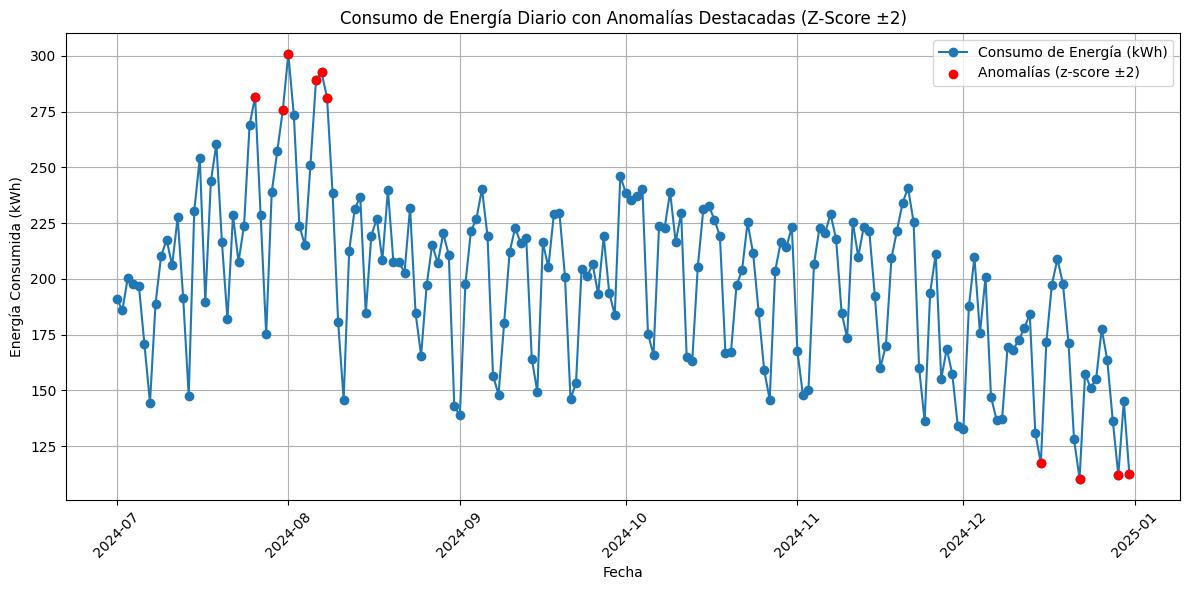

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Cargar el dataset
df = pd.read_csv("data/m6_consumo_energia.csv")
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Interpolar valores faltantes en 'Energia Consumida'
df['Energia Consumida'] = df['Energia Consumida'].interpolate()

# Calcular z-score
df['z_score'] = zscore(df['Energia Consumida'])

# Detectar anomalías con umbral ±2
threshold = 2
df['Anomalia'] = abs(df['z_score']) > threshold

# Generar gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['Fecha'], df['Energia Consumida'], label='Consumo de Energía (kWh)', marker='o')
plt.scatter(df[df['Anomalia']]['Fecha'],
            df[df['Anomalia']]['Energia Consumida'],
            color='red', label='Anomalías (z-score ±2)', zorder=5)
plt.title('Consumo de Energía Diario con Anomalías Destacadas (Z-Score ±2)')
plt.xlabel('Fecha')
plt.ylabel('Energía Consumida (kWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## ✅ Conclusiones del ejercicio

- Los LLMs pueden detectar valores atípicos en datos temporales usando lenguaje natural.
- Es posible validar el análisis mediante código generado automáticamente.
- Esto permite al profesorado aplicar IA sin necesidad de conocimientos avanzados de estadística.

---

## 🔗 Recursos complementarios

- 📘 [Anomaly Detection in Time Series using ChatGPT](https://medium.com/@sztistvan/anomaly-detection-in-time-series-using-chatgpt-3fc48f958c88)